**Linear regression from scratch**

In [44]:
import matplotlib.pyplot as plt
import numpy as np
import random

This code shows four different lines with a different offset from 30 to 5  and increase slope from 0.2 to 0.8

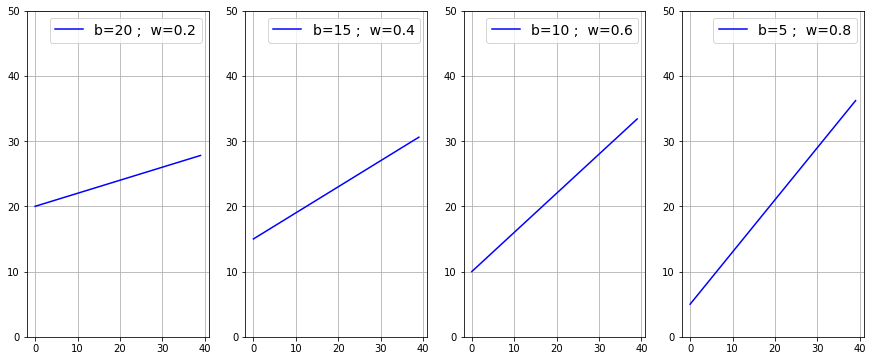

In [45]:
fig, axs = plt.subplots (1,4, figsize = (15,6))
X= np.array(range(40))
for fig, b, w in zip ([0,1,2,3],[20,15,10,5],[0.2,0.4,0.6,0.8]):
  y= b + w*X
  axs[fig].plot(X, y, 'b-', label = 'b='+format(b)+' ;  w=' +format(w))
  axs[fig].set_ylim(bottom = 0, top =50), axs[fig].legend();
  axs[fig].legend(prop = {'size': 14}); axs[fig].grid();
plt.show()

In [46]:
def gradient_regression (X, y, alpha, b,  w):
  dw=0.0; db = 0.0
  #We make the model using all the examples
  for i in range(len(X)):
    aux = -2.0*(y[i]-(w*X[i]+b))
    db= db + aux   # This solver easily overflow
    dw = dw + X[i]*aux # This solver easily overflow
  aux = 1.0/float(len(X))
  b= b - aux*db*alpha
  w= w- aux*dw*alpha
  return b,w 

In [47]:
def gradient_regression2 (X, y, alpha, b,  w):
  aux = -2*(y-(w*X+b)).sum()
  b= b - alpha*aux/float(len(X))
  w= w - alpha*aux/float(len(X))
  return b, w

In [48]:
def plot (fig, X, y, b, w, epochs):
  axs[fig].plot(X,y, 'yo', label = ' Samples')
  X = np.array(X)
  axs[fig].plot(X, w*X+b, 'k-', label = 'Regression loss: '+'{:9.2f}'.format(loss(X,y,b,w)))
  axs[fig].set_xlabel('{:5.0f}'.format(epochs) + ' epochs')
  axs[fig].legend();axs[fig].grid();
  return

In [49]:
def model (X,y, alpha, b, w, epochs):
  fig =0
  for e in range(epochs):
    b,w = gradient_regression(X,y,alpha,b,w)
    if e % 3000 ==0:
      plot(fig, X, y, b, w, e)
      fig+=1
  return b,w

In [50]:
def prediction (x,b,w):
  return (x*w+b)

In [51]:
def loss(X, y, b, w):
  sum = 0
  for i in range(len(X)):
    sum +=(y[i]-prediction(X[i], b, w))**2
  return sum/len(X)   

In [52]:
def create_samples(n):
  y=[]; X = list(range(40))
  for i in range(len(X)):
    y.append(20 + X[i]+random.random()*20)
  return X, y  

In [53]:
def create_samples2(n):
  X=np.array(list(range(40)))
  y=20+X+np.random.rand(40)*20
  return X, y

In [75]:
X,y =create_samples2(40)

In this example we do not change epochs value, since we just plots for the values (0, 3000,6000, 9000)

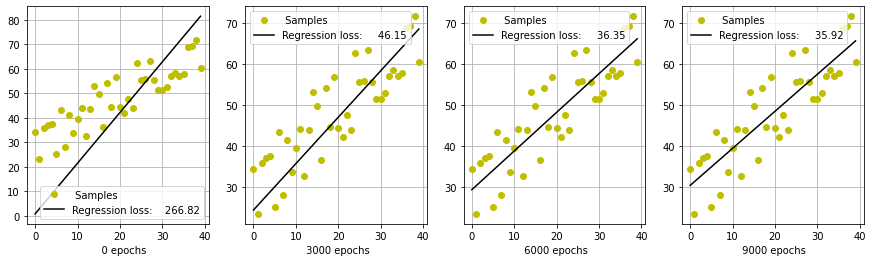

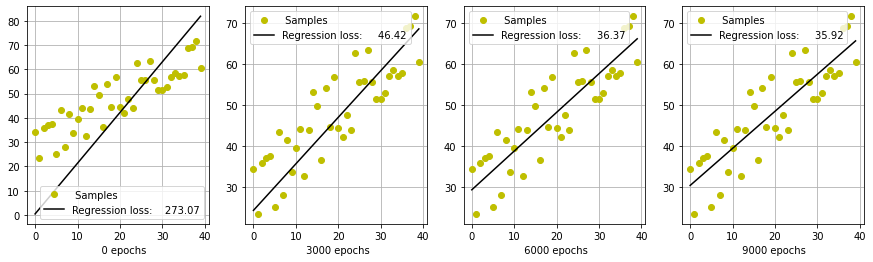

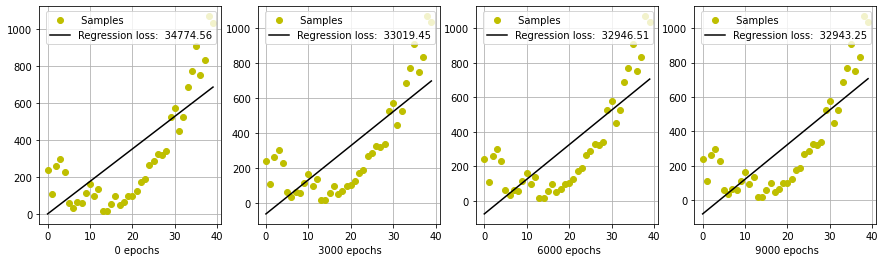

39.38196094940767
48.42755546303681


In [76]:
EPOCHS = 9001;
#linear regression evolution
fig, axs = plt.subplots(1,4, figsize = (15,4))
#b and w parameters can be better initialized
b,w = model (X, y, 0.001, random.random() , random.random() , EPOCHS)

#linear regression using a wrong alpha
fig, axs = plt.subplots(1,4,figsize= (15,4))
#b and w parameters can be better initialized
b,w = model (X,y, 0.001, random.random(), random.random(), EPOCHS)
y=[]
for i in range(len(X)):
  y.append((X[i]-10)**2+ random.random()*20*abs(len(X)/2-i))

#loss evolution 
fig, axs = plt.subplots(1,4, figsize= (15,4))
#b and w parameters can be better initialized 
model(X, y ,0.001, random.random(), random.random(), EPOCHS)

plt.show()

print(prediction(10,b,w))
print(prediction(20,b,w))